## 선형모델

In [2]:
# 오류 메세지 방지용
import warnings
warnings.filterwarnings(action='ignore')

[1] 회귀의 선형 모델

[1] - (1) wave() 데이터셋으로 학습(1차원)

---

[1] - (1) 선형 회귀 (최소제곱법)  
가장 간단난 회귀 모델  
**평균제곱오차** (예측값과 타깃 값 차이를 제곱하여 더한 후 샘플의 개수로 나눈 것)를 최소화하는 기울기와 절편을 찾는 방법

In [3]:
# 라이브러리 호출
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import mglearn

In [4]:
# 데이터 호출
X, y = mglearn.datasets.make_wave(n_samples=60)

# 데이터 나누기
X_train, X_test, y_train, y_test = train_test_split(
    X, y, random_state=42
)

In [5]:
# 모델 호출 및 훈련
lr = LinearRegression().fit(X_train, y_train)

In [6]:
# 가중치(=기울기)와 절편 확인
print("가중치 :", lr.coef_)
print("절편 :", lr.intercept_)

가중치 : [0.39390555]
절편 : -0.031804343026759746


특성(feature)가 하나면서 일차방정식이라서 가중치도 하나다

In [7]:
# 모델 성능 확인
print("훈련 세트 점수 : {:.2f}".format(lr.score(X_train, y_train)))
print("테스트 세트 점수 : {:.2f}".format(lr.score(X_test, y_test)))

훈련 세트 점수 : 0.67
테스트 세트 점수 : 0.66


가장 간단한 모델답게 점수($R^2$)이 아주 낮은걸 볼 수 있다.

특성이 많은 고차원 데이터셋에서는 과대적합될 가능성이 높음

Ex) 보스턴 주택가격 데이터셋

In [8]:
# 데이터 호출
X, y = mglearn.datasets.load_extended_boston()

# 데이터 분리
X_train, X_test, y_train, y_test = train_test_split(
    X, y, random_state=0
)

# 모델 생성 및 호출
lr = LinearRegression().fit(X_train, y_train)

In [9]:
# 모델 성능 확인
print("훈련 세트 점수 : {:.2f}".format(lr.score(X_train, y_train)))
print("테스트 세트 점수 : {:.2f}".format(lr.score(X_test, y_test)))

훈련 세트 점수 : 0.95
테스트 세트 점수 : 0.61


위와 같은 과대적합을 방지하기 위해 복잡도를 제어할 수 있는 모델을 사용해야됨  
ex) 리지 회귀

---

[1] - (2) 리지 회귀   
L2 규제 사용 : 가중치의 절대값을 가능한 한 작게 만들어 과대적합을 방지

In [10]:
# 모델 라이브러리 호출
from sklearn.linear_model import Ridge

# 모델 생성 및 훈련
ridge = Ridge().fit(X_train, y_train)

# 모델 점수 확인
print("훈련 세트 점수 : {:.2f}".format(ridge.score(X_train, y_train)))
print("테스트 세트 점수 : {:.2f}".format(ridge.score(X_test, y_test)))

훈련 세트 점수 : 0.89
테스트 세트 점수 : 0.75


확장 보스턴 주택가격 데이터에 대하여  
선형 회귀모델모다 훈련 세트 점수는 낮지만 테스트 세트 점수는 높은 것을 알 수 있다.  
따라서 과대적합이 적어짐

ridge 모델은 제약에 관련된 파라미터인 alpha값을 조절하여 모델을 조정할 수 있음 (alpha 기본값 : 1.0)

In [11]:
# alpha가 10인 경우 
ridge10 = Ridge(alpha=10).fit(X_train, y_train)

print("훈련 세트 점수 : {:.2f}".format(ridge10.score(X_train, y_train)))
print("테스트 세트 점수 : {:.2f}".format(ridge10.score(X_test, y_test)))

훈련 세트 점수 : 0.79
테스트 세트 점수 : 0.64


alpha를 높이면 계수의 제약을 더 가하여 훈련세트의 기능은 나빠지지만 일반화를 높임

In [12]:
# alpha가 0.1인 경우 
ridge01 = Ridge(alpha=0.1).fit(X_train, y_train)

print("훈련 세트 점수 : {:.2f}".format(ridge01.score(X_train, y_train)))
print("테스트 세트 점수 : {:.2f}".format(ridge01.score(X_test, y_test)))

훈련 세트 점수 : 0.93
테스트 세트 점수 : 0.77


alpha를 낮추면 계수의 제약을 풀어 훈련세트의 기능은 높아지지만 일반화가 떨어짐

alpha에 따른 가중치 시각화

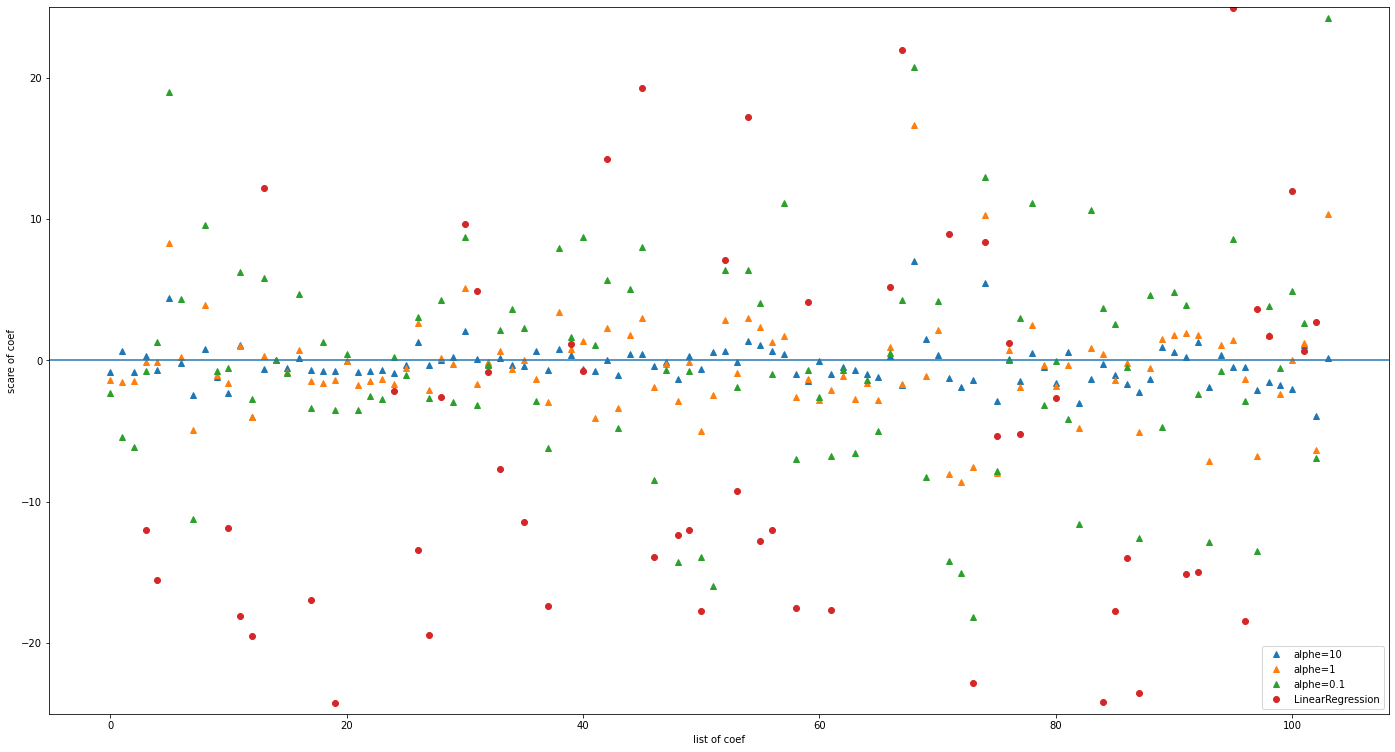

In [13]:
# 시각화
import matplotlib.pyplot as plt

plt.figure(figsize=(24,13))

plt.plot(ridge10.coef_, '^', label = 'alphe=10')
plt.plot(ridge.coef_, '^', label = 'alphe=1')
plt.plot(ridge01.coef_, '^', label = 'alphe=0.1')

plt.plot(lr.coef_, 'o', label='LinearRegression')
plt.xlabel('list of coef')
plt.ylabel('scare of coef')

xlims = plt.xlim()
plt.hlines(0, xlims[0], xlims[1])

plt.xlim(xlims)
plt.ylim(-25, 25)
plt.legend()

alpha = 10 : 대부분 0에 근접  
alpha = 1 : 10보다 0에서 멀어짐  
alpha = 0.1 : 제약이 없는 상태와 비슷

학습곡선(alpha는 고정하고 훈련 데이터의 크기를 변화시켜 규제의 효과 확인)

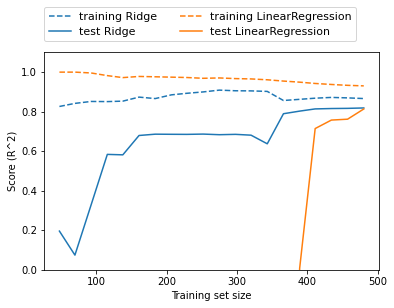

In [14]:
mglearn.plots.plot_ridge_n_samples()

데이터가 충분히 많아지면 리지 회귀와 선형 회귀의 성능이 같아짐을 알 수 있음

---

[1] - (3) 라소 회귀   
L1 규제 사용 : 가중치의 절대값을 0으로도 과대적합을 방지

In [15]:
# 모델 라이브러리 호출
import numpy as np
from sklearn.linear_model import Lasso

# 모델 생성 및 훈련
lasso = Lasso().fit(X_train, y_train)

# 모델 점수 확인 및 사용 특성 수 확인
print("훈련 세트 점수 : {:.2f}".format(lasso.score(X_train, y_train)))
print("테스트 세트 점수 : {:.2f}".format(lasso.score(X_test, y_test)))
print("사용한 특성 수 :", np.sum(lasso.coef_ != 0))

훈련 세트 점수 : 0.29
테스트 세트 점수 : 0.21
사용한 특성 수 : 4


모델 점수가 아주 낮으며 사용한 특성도 104개중 단 4개만 사용한 것을 알 수 있음

alpha 값을 조절해서 과소적합을 조절

In [16]:
# 모델 생성 및 훈련
lasso001 = Lasso(alpha=0.01).fit(X_train, y_train)

# 모델 점수 확인 및 사용 특성 수 확인
print("훈련 세트 점수 : {:.2f}".format(lasso001.score(X_train, y_train)))
print("테스트 세트 점수 : {:.2f}".format(lasso001.score(X_test, y_test)))
print("사용한 특성 수 :", np.sum(lasso001.coef_ != 0))

훈련 세트 점수 : 0.90
테스트 세트 점수 : 0.77
사용한 특성 수 : 32


제약을 줄이니 모델 점수가 늘어나며 사용한 특성도 늘어난 것을 알 수 있음

In [17]:
# 모델 생성 및 훈련
lasso00001 = Lasso(alpha=0.0001).fit(X_train, y_train)

# 모델 점수 확인 및 사용 특성 수 확인
print("훈련 세트 점수 : {:.2f}".format(lasso00001.score(X_train, y_train)))
print("테스트 세트 점수 : {:.2f}".format(lasso00001.score(X_test, y_test)))
print("사용한 특성 수 :", np.sum(lasso00001.coef_ != 0))

훈련 세트 점수 : 0.94
테스트 세트 점수 : 0.70
사용한 특성 수 : 100


하지만 지나치게 alpha가 낮으면 규제가 없는 LinearRegression과 비슷한 상태가 됨

alpha에 따른 가중치 시각화

Text(0, 0.5, 'scare of coef')

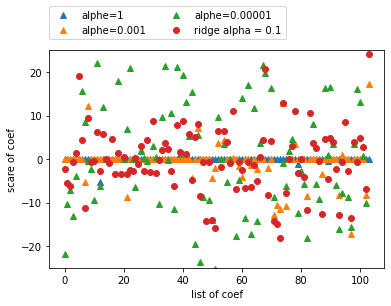

In [18]:
# 시각화

plt.plot(lasso.coef_, '^', label = 'alphe=1')
plt.plot(lasso001.coef_, '^', label = 'alphe=0.001')
plt.plot(lasso00001.coef_, '^', label = 'alphe=0.00001')

plt.plot(ridge01.coef_, 'o', label='ridge alpha = 0.1')
plt.legend(ncol = 2, loc = (0, 1.05))
plt.ylim(-25, 25)
plt.xlabel('list of coef')
plt.ylabel('scare of coef')

---

리지와 라소 비교  
리지 : 일반적으로 선호됨  
라소 : 특성이 지나치게 많고 일부만 중요한 경우, 분석하기 쉬운 모델이 필요한 경우  


* 라소와 리지를 합친 ElasticNet 이란 모델도 존재

---

[2] 분류의 선형 모델  
주로 로지스틱 회귀와 서포트 벡터 머신(SVC) 사용

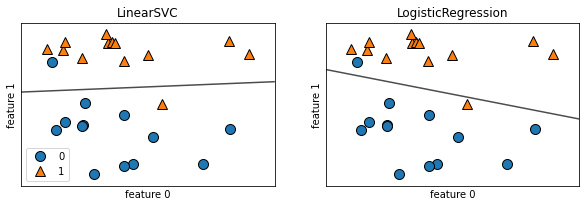

In [19]:
# 모듈 라이브러리 호출
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC

X, y  = mglearn.datasets.make_forge()

fig, axes = plt.subplots(1, 2, figsize = (10, 3))

for model, ax in zip([LinearSVC(max_iter=5000), LogisticRegression()], axes):
    clf = model.fit(X, y)
    mglearn.plots.plot_2d_separator(clf, X, fill=False, eps=0.5, ax=ax, alpha=.7)
    mglearn.discrete_scatter(X[:, 0], X[:, 1], y, ax=ax)
    ax.set_title(clf.__class__.__name__)
    ax.set_xlabel('feature 0')
    ax.set_ylabel('feature 1')
axes[0].legend()

위의 두 모델 모두 L2 규제를 사용한다  
규제의 매개변수는 C로 C값이 높아질수록 규제가 감소한다

---

다중 클래스 분류용 선형 모델

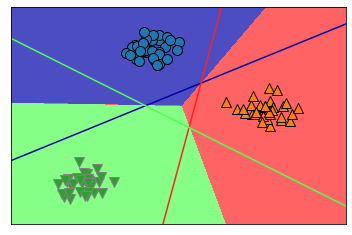

In [20]:
from sklearn.datasets import make_blobs

X, y = make_blobs(random_state=42)

linear_svm = LinearSVC().fit(X, y)

mglearn.plots.plot_2d_classification(linear_svm, X, fill=True, alpha=0.7)
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
line = np.linspace(-15, 15)
for coef, intercept, color in zip(linear_svm.coef_, linear_svm.intercept_, mglearn.cm3.colors):
    plt.plot(line, -(line * coef[0] + intercept) / coef[1], c = color)


---

선형 모델의 장단점  
* 장점  
    * 학습 속도가 빠르고 예측도 빠름  
    * 예측의 이해가 쉬움  
    * 특성이 많은 데이터셋에 잘 작동함  
* 단점
    * 특성간 상관관계가 높은 경우를 잘 구분하지 못함  
    * 특성이 적은 데이터셋에는 잘 잘동하지 않음